In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report,accuracy_score

In [2]:
df=pd.read_csv('Customer_Churn.csv')

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.drop('customerID',axis=1,inplace=True)

In [7]:
df.columns=df.columns.str.lower()

In [8]:
df.columns

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [9]:
df.drop(df[df['totalcharges'] == ' '].index, inplace=True)

In [10]:
x=df.drop('churn',axis=1)
y=df['churn']

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=69)

In [12]:
"""def encode_data(dataframe):
    if dataframe.dtype == "object":
        dataframe = LabelEncoder().fit_transform(dataframe)
    return dataframe

x_train = x_train.apply(lambda x: encode_data(x))
x_test = x_test.apply(lambda x: encode_data(x))"""

'def encode_data(dataframe):\n    if dataframe.dtype == "object":\n        dataframe = LabelEncoder().fit_transform(dataframe)\n    return dataframe\n\nx_train = x_train.apply(lambda x: encode_data(x))\nx_test = x_test.apply(lambda x: encode_data(x))'

In [13]:
x_train

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
6139,Male,0,No,Yes,3,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.20,50.6
3748,Male,0,No,No,48,Yes,No,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),78.90,3771.5
6732,Female,0,No,No,24,Yes,Yes,Fiber optic,No,No,No,Yes,No,Yes,Month-to-month,Yes,Electronic check,89.55,2259.35
5552,Male,0,Yes,Yes,22,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),20.25,488.25
3640,Male,1,Yes,No,29,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,95.90,2745.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6557,Female,0,No,No,33,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,100.00,3320.6
439,Male,0,No,No,1,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check,55.05,55.05
1631,Female,1,Yes,No,17,Yes,Yes,Fiber optic,Yes,No,Yes,No,No,No,Month-to-month,Yes,Bank transfer (automatic),85.35,1463.45
2672,Male,0,No,No,27,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),20.10,562.6


<Axes: >

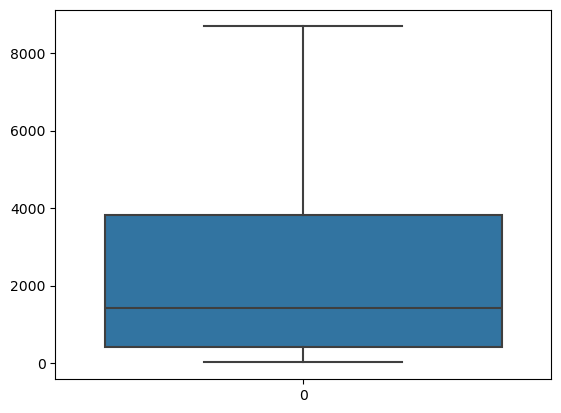

In [14]:
sns.boxplot(x_train['totalcharges'])

<Axes: >

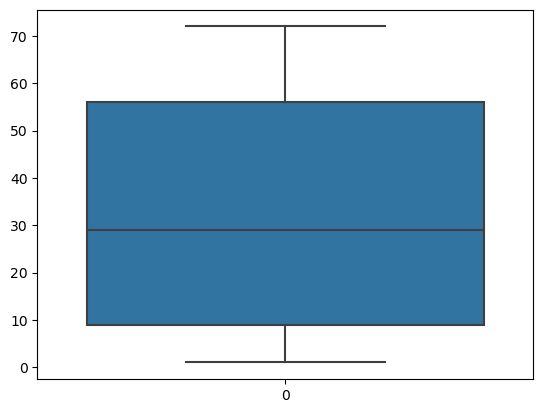

In [15]:
sns.boxplot(x_train['tenure'])

<Axes: >

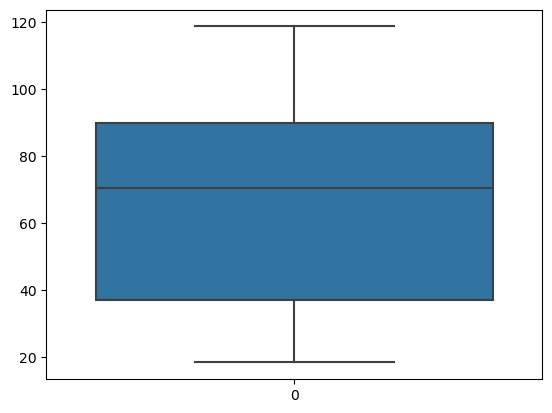

In [16]:
sns.boxplot(x_train['monthlycharges'])

In [17]:
categorical_indices_numeric = [df.columns.get_loc(col) for col in df.select_dtypes(include='object').columns]

In [18]:
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_indices_numeric[:-1])
    ]
)

In [19]:
pipelines = {
    'RandomForest': Pipeline([
        ('preprocessor', preprocessor),
        ('feature_selection', SelectKBest(score_func=chi2)),
        ('classifier', RandomForestClassifier())
    ]),
    'DecisionTrees': Pipeline([
        ('preprocessor', preprocessor),
        ('feature_selection', SelectKBest(score_func=chi2)),
        ('classifier', DecisionTreeClassifier())
    ]),
    'LogisticRegression': Pipeline([
        ('preprocessor', preprocessor),
        ('feature_selection', SelectKBest(score_func=chi2)),
        ('classifier', LogisticRegression())
    ]),
    'KNeighbors': Pipeline([
        ('preprocessor', preprocessor),
        ('feature_selection', SelectKBest(score_func=chi2)),
        ('classifier', KNeighborsClassifier())
    ]),
    'NaiveBayes': Pipeline([
        ('preprocessor', preprocessor),
        ('feature_selection', SelectKBest(score_func=chi2)),
        ('classifier', MultinomialNB())
    ])
}

param_grids = {
    'RandomForest': {
        'feature_selection__k': [5, 10, 15],  
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 10, 20]
    },
    'DecisionTrees': {
        'feature_selection__k': [5, 10, 15],  
        'classifier__max_depth': [None, 10, 20]
    },
    'LogisticRegression': {
        'feature_selection__k': [5, 10, 15]
    },
    'KNeighbors': {
        'feature_selection__k': [5, 10, 15], 
        'classifier__n_neighbors': [3, 5, 7, 9]
    },
    'NaiveBayes': {
        'feature_selection__k': [5, 10, 15]  
    }
}


In [20]:
best_models = {}
for algo in pipelines.keys():
    print("*" * 10, algo, "*" * 10)
    grid_search = GridSearchCV(estimator=pipelines[algo],
                               param_grid=param_grids[algo],
                               cv=5,
                               scoring='accuracy',
                               return_train_score=True,
                               verbose=1)

    grid_search.fit(x_train, y_train)

    train_score = grid_search.best_score_
    test_score = grid_search.score(x_test, y_test)

    print('Train Score: ', train_score)
    print('Test Score: ', test_score)

    best_models[algo] = grid_search.best_estimator_
    print()


********** RandomForest **********
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Train Score:  0.7868777035351673
Test Score:  0.7764505119453925

********** DecisionTrees **********
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Train Score:  0.7866875904925493
Test Score:  0.7764505119453925

********** LogisticRegression **********
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Train Score:  0.7849839474086531
Test Score:  0.7770193401592719

********** KNeighbors **********
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Train Score:  0.7722787485273884
Test Score:  0.7650739476678043

********** NaiveBayes **********
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Train Score:  0.7360637427268721
Test Score:  0.7286689419795221



In [21]:
import pickle
pickle.dump(pipelines['RandomForest'].fit(x_train,y_train),open("churn.pkl","wb"))
predict = pickle.load(open("churn.pkl","rb"))

In [22]:
predict.predict([df.drop('churn',axis=1).iloc[2]])[0]

'No'